# 1. Data Preprocessing

## 1.1. Dataset Preview

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("bank_churners.csv")
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
df1.shape

(10127, 23)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## 1.2 Understanding Dataset's Features

In [4]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
categorical_cols = list(df1.select_dtypes('object'))
categorical_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [6]:
numerical_cols = list(df1.select_dtypes(['int64','float64']))
numerical_cols

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

### 1.2.1 Dropping unnecessary columns

In [7]:
df2 = df1.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis='columns')

In [8]:
df2.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [10]:
df2['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### 1.2.2 Renaming columns

In [11]:
df2.rename(columns={'Dependent_count': 'Dependent_Count', 'Months_on_book': 'Account_Age', 'Total_Relationship_Count': 'Total_Number_of_Accounts',
                   'Months_Inactive_12_mon': 'Months_Inactive', 'Contacts_Count_12_mon':'Contacts_Count', 'Total_Revolving_Bal': 'Total_Revolving_Balance',
                   'Avg_Open_To_Buy': 'Average_Amount_Available', 'Total_Amt_Chng_Q4_Q1':'Total_Amount_Change_Q4-Q1', 'Total_Trans_Amt': 'Total_Transaction_Amount',
                    'Total_Trans_Ct': 'Total_Transaction_on_Account', 'Total_Ct_Chng_Q4_Q1': 'Total_Transactions_Change_Q4-Q1', 'Avg_Utilization_Ratio': 'Average Utilization Ratio'}, inplace=True)
df2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_Count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Account_Age', 'Total_Number_of_Accounts', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Balance',
       'Average_Amount_Available', 'Total_Amount_Change_Q4-Q1',
       'Total_Transaction_Amount', 'Total_Transaction_on_Account',
       'Total_Transactions_Change_Q4-Q1', 'Average Utilization Ratio'],
      dtype='object')

### 1.2.3. Checking missing values

In [12]:
df2.isnull().sum().sort_values(ascending=False)

Attrition_Flag                     0
Customer_Age                       0
Total_Transactions_Change_Q4-Q1    0
Total_Transaction_on_Account       0
Total_Transaction_Amount           0
Total_Amount_Change_Q4-Q1          0
Average_Amount_Available           0
Total_Revolving_Balance            0
Credit_Limit                       0
Contacts_Count                     0
Months_Inactive                    0
Total_Number_of_Accounts           0
Account_Age                        0
Card_Category                      0
Income_Category                    0
Marital_Status                     0
Education_Level                    0
Dependent_Count                    0
Gender                             0
Average Utilization Ratio          0
dtype: int64

### 1.2.4 Checking unique values in each columns

In [13]:
for col in df2:
    uniq = df2[col].value_counts()
    print(uniq, '\n_____________________\n')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 
_____________________

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64 
_____________________

F    5358
M    4769
Name: Gender, dtype: int64 
_____________________

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_Count, dtype: int64 
_____________________

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 


### 1.2.5 Replacing "Unknown" values

Replacing "Unknown" values in Income Category, Marital Status, and Education Level to the value with most occurrences every column

In [14]:
income_category_mode = df2['Income_Category'].mode()[0]
income_category_mode

'Less than $40K'

In [15]:
df2['Income_Category'].replace('Unknown', income_category_mode, inplace=True)

In [16]:
df2['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
marital_status_mode = df2['Marital_Status'].mode()[0]
df2['Marital_Status'].replace('Unknown', marital_status_mode, inplace=True)
df2['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [18]:
educ_level_mode = df2['Education_Level'].mode()[0]
df2['Education_Level'].replace('Unknown', educ_level_mode, inplace=True)
df2['Education_Level'].value_counts()

Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

## 1.3 Target Feature Exploration

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('pastel')

In [19]:
df2['Attrition_Flag'] = df2['Attrition_Flag'].map({'Existing Customer': 0, 
                                                 'Attrited Customer':1})

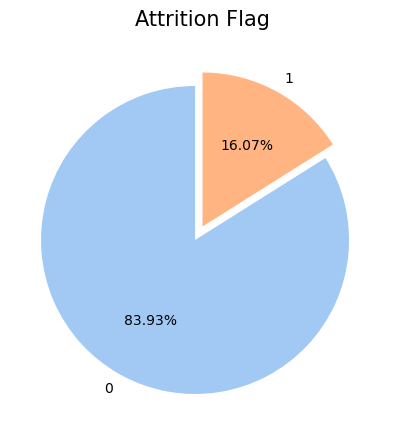

In [20]:
attr_count = df2['Attrition_Flag'].value_counts()
attr_label = df2['Attrition_Flag'].value_counts().index

fig,ax = plt.subplots(figsize=(7,5))

ax.pie(attr_count, explode = (0.1, 0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Attrition Flag', fontsize=15)

plt.show()

**1: Existing Customer**
**0: Attrited Customer**

Pie Chart shows that 16.07% (1627/10127) of the Customers attrited while 83.93% are still active

## 1.4 Oversampling

The distribution of classes is not equal and can lead to biased models, where the minority class is often misclassified. The technique that we are going to use to balance the dataset is the Synthetic Minority Oversampling Technique (SMOTE). To apply SMOTE, all variables in the dataset should be in integer or float form.

In [21]:
df2['Income_Category'] = df2['Income_Category'].replace(
    {
        'Unknown': 0, 'Less than $40K': 1, 
        '$40K - $60K': 2, '$60K - $80K': 3, 
        '$80K - $120K': 4, '$120K +': 5
    }
)
df2['Attrition_Flag'] = df2['Attrition_Flag'].replace(
    {
        'Attrited Customer': 1, 'Existing Customer': 0
    }
)
df2['Gender'] = df2['Gender'].replace(
    {
        'F': 0, 'M': 1
    }
)
df2['Education_Level'] = df2['Education_Level'].replace(
    {
        'Unknown': 0, 'Uneducated': 1, 'High School': 2,
        'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
    }
)
df2['Marital_Status'] = df2['Marital_Status'].replace(
    {
        'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3
    }
)
df2['Card_Category'] = df2['Card_Category'].replace(
    {
        'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3
    }
)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Attrition_Flag                   10127 non-null  int64  
 1   Customer_Age                     10127 non-null  int64  
 2   Gender                           10127 non-null  int64  
 3   Dependent_Count                  10127 non-null  int64  
 4   Education_Level                  10127 non-null  int64  
 5   Marital_Status                   10127 non-null  int64  
 6   Income_Category                  10127 non-null  int64  
 7   Card_Category                    10127 non-null  int64  
 8   Account_Age                      10127 non-null  int64  
 9   Total_Number_of_Accounts         10127 non-null  int64  
 10  Months_Inactive                  10127 non-null  int64  
 11  Contacts_Count                   10127 non-null  int64  
 12  Credit_Limit      

In [23]:
from sklearn.model_selection import train_test_split

x = df2[['Total_Transaction_on_Account', 'Total_Transaction_Amount', 'Total_Revolving_Balance', 'Total_Transactions_Change_Q4-Q1', 'Total_Number_of_Accounts', 'Total_Amount_Change_Q4-Q1', 'Average Utilization Ratio']]
y = df2['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [24]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state = 7)

xx_train, yy_train = sm.fit_resample(x_train, y_train)
df_train = pd.concat([pd.DataFrame(yy_train), pd.DataFrame(xx_train)], axis = 1)

XX, YY = sm.fit_resample(df2.drop('Attrition_Flag', axis=1), df2['Attrition_Flag'])

df3 = pd.concat([pd.DataFrame(YY), pd.DataFrame(XX)], axis=1)

In [26]:
print('Before SMOTE:') 
print(df2['Attrition_Flag'].value_counts(), '\n')

print('After SMOTE:')
print(df3['Attrition_Flag'].value_counts())

Before SMOTE:
0    8500
1    1627
Name: Attrition_Flag, dtype: int64 

After SMOTE:
0    8500
1    8500
Name: Attrition_Flag, dtype: int64


In [27]:
df3.shape

(17000, 20)

# 4. Model 

In [28]:
from sklearn.metrics import classification_report

# Prepare training data from oversampled data
x_os = df_train.drop(['Attrition_Flag'], axis=1)
y_os = df_train['Attrition_Flag']

In [29]:
x_os.shape, x_test.shape

((13674, 7), (2026, 7))

y_os.shape, y_test.shape

## 4.5 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_os, y_os)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1663
           1       0.86      0.90      0.87       363

    accuracy                           0.95      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.96      0.95      0.95      2026



The feature importance is proportional to the total reduction in impurity that is achieved by splitting on that feature.

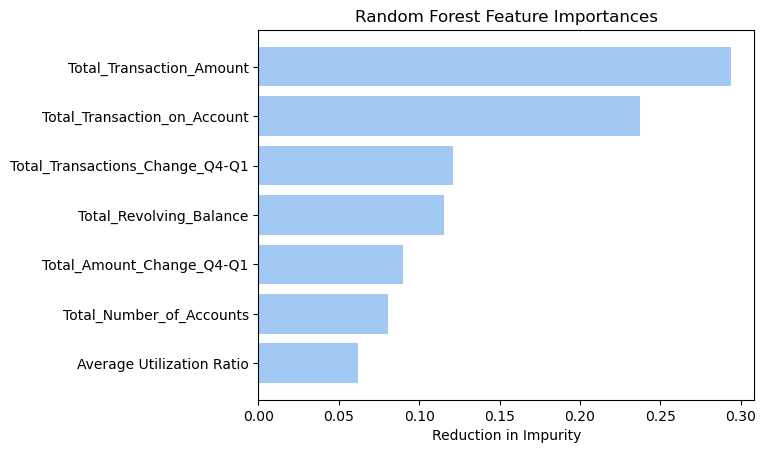

In [31]:
%matplotlib inline
importances = rf.feature_importances_
sorted_index = np.argsort(importances)
labels = x.columns[sorted_index]

plt.title("Random Forest Feature Importances")
plt.barh(labels, importances[sorted_index])
plt.xlabel('Reduction in Impurity')
plt.show()

Overall, Random Forest performed the best across different metrics among other classification models.

In [32]:
# 'Attrited Customer': 1, 'Existing Customer': 0
rf.classes_

array([0, 1], dtype=int64)

In [33]:
# x = df2[['Total_Transaction_on_Account', 'Total_Transaction_Amount', 'Total_Revolving_Balance', 'Total_Transactions_Change_Q4-Q1', 'Total_Number_of_Accounts', 'Total_Transactions_Change_Q4-Q1', 'Total'Average Utilization Ratio']]
def predict_churn(*args):    
    # total_trans_acc, total_trans_amt, total_rev_bal, total_trans_change, total_accounts, avg_util_ratio = *args

    return rf.predict_proba([[*args]])[0] # [%churn, %notchurn]

In [34]:
predict_churn(9,3,3,3,3,3,3)

C:\Users\AJ\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.53, 0.47])

In [35]:
import pickle
with open('credit_card_churn.pickle','wb') as f:
    pickle.dump(rf, f)

In [36]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90ae0d34-e77a-46ee-93f8-314551955578' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>